# MCA Analysis

In [1]:
import pandas as pd
import prince
import matplotlib.pyplot as plt
import seaborn as sns # plot

In [2]:
data = pd.read_csv("dataset/shootings.csv")
#removing columns not used for analysis (can change to test things out)
dataDropped = data.drop(columns=[
    "id",
    "name",
    "date",
    #"age",
    #"race",
    #"signs_of_mental_illness",
    #"body_camera",
    "armed",
    #"arms_category",
    "city",
    #"state",
    #"manner_of_death",
    #"gender",
    #"threat_level",
    #"flee"
])

#converting all data to string for MCA
def toStringRow(row):
    for i in range(len(row)):
        if type(row.iloc[i]) != str:
            row.iloc[i] = str(row.iloc[i])
    return row

unprocessedData = dataDropped.apply(toStringRow, axis=1)

unprocessedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   manner_of_death          4895 non-null   object
 1   age                      4895 non-null   object
 2   gender                   4895 non-null   object
 3   race                     4895 non-null   object
 4   state                    4895 non-null   object
 5   signs_of_mental_illness  4895 non-null   object
 6   threat_level             4895 non-null   object
 7   flee                     4895 non-null   object
 8   body_camera              4895 non-null   object
 9   arms_category            4895 non-null   object
dtypes: object(10)
memory usage: 382.5+ KB


In [3]:
preprocesseddata = pd.read_csv("dataset/preprocessed-shootings.csv")
preprocesseddata.head()

,manner_of_death,age,gender,race,region,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,shot,51-75,M,Asian,Pacific,Yes,attack,Not fleeing,No,Guns
1,shot,36-50,M,White,Pacific,No,attack,Not fleeing,No,Guns
2,shot and Tasered,19-25,M,Hispanic,West North Central,No,other,Not fleeing,No,Unarmed
3,shot,26-35,M,White,Pacific,Yes,attack,Not fleeing,No,Other unusual objects
4,shot,36-50,M,Hispanic,Mountain,No,attack,Not fleeing,No,Other weapon objects


## MCA Calculations - unprocessed data

In [4]:
mca = prince.MCA(n_components=5, benzecri=False).fit(unprocessedData)

[0.01218624880462747, 0.01165870981404562, 0.010151693618385567, 0.009856406715585901, 0.009370164794099788]
15.0


<AxesSubplot: title={'center': 'Row and column principal coordinates'}, xlabel='Component 0 (1.22% inertia)', ylabel='Component 1 (1.17% inertia)'>

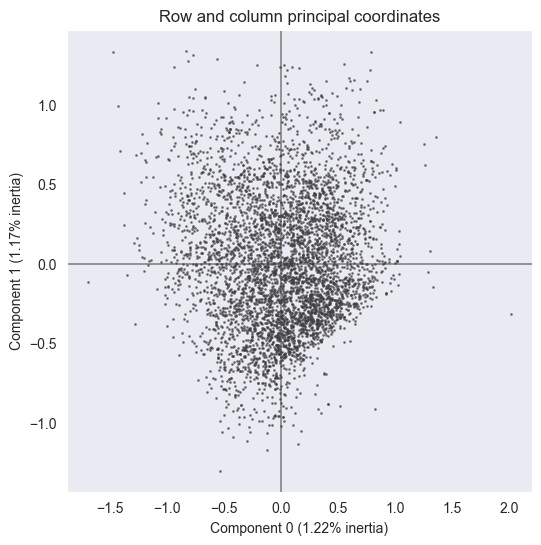

In [15]:
print(mca.explained_inertia_)
print(mca.total_inertia_)

#this displays only the categories in the graph, the closer they are, the more related they are
mca.plot_coordinates(
    X=unprocessedData,
    figsize=(6, 6),
    x_component=0,
    y_component=1,
    show_row_points=True,
    row_points_size=1,
    show_row_labels=False,
    show_column_points=False,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1
)

In [6]:
#saving point cloud
mca.row_coordinates(unprocessedData).to_csv("dataset/mca-shootings.csv", index=False)
mca.column_coordinates(unprocessedData).to_csv("dataset/mca-categories-shootings.csv",
                                                      index_label="arms_category")

## MCA Calculations - preprocessed data

[0.17436560248214103, 0.16614307880730014, 0.14258472859160962, 0.13181554785655308, 0.12560400262128998, 0.11508852898037478, 0.11292246618889865, 0.11004956879567844, 0.10606413415624066, 0.10542531830232053]
[0.05128400073004148, 0.04886561141391181, 0.04193668487988518, 0.03876927878133914, 0.03694235371214411, 0.033849567347169054, 0.03321249005555842, 0.03236752023402307, 0.0311953335753649, 0.03100744655950604]
3.4


<AxesSubplot: title={'center': 'Row and column principal coordinates'}, xlabel='Component 0 (5.13% inertia)', ylabel='Component 1 (4.89% inertia)'>

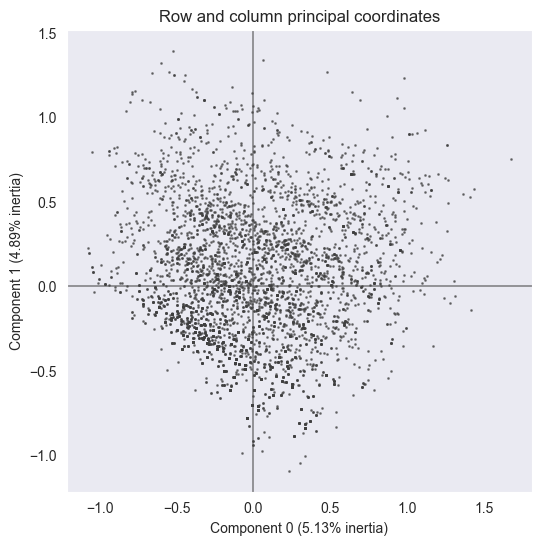

In [17]:
mcaPrePro = prince.MCA(n_components=10, benzecri=False).fit(preprocesseddata)
print(mcaPrePro.eigenvalues_)
print(mcaPrePro.explained_inertia_)
print(mcaPrePro.total_inertia_)

#this displays only the categories in the graph, the closer they are, the more related they are
mcaPrePro.plot_coordinates(
    X=preprocesseddata,
    figsize=(6, 6),
    x_component=0,
    y_component=1,
    show_row_points=True,
    row_points_size=1,
    show_row_labels=False,
    show_column_points=False,
    column_points_size=30,
    show_column_labels=False,
    legend_n_cols=1
)

In [18]:
#saving point cloud
mcaPrePro.row_coordinates(preprocesseddata).to_csv("dataset/preprocessed-mca-shootings.csv", index=False)

In [19]:
mcaPrePro.column_coordinates(preprocesseddata).to_csv("dataset/preprocessed-mca-categories-shootings.csv", index_label="category")

## Inertia per component

[0.05128400073004148,
 0.04886561141391181,
 0.04193668487988518,
 0.03876927878133914,
 0.03694235371214411,
 0.033849567347169054,
 0.03321249005555842,
 0.03236752023402307,
 0.0311953335753649,
 0.03100744655950604]

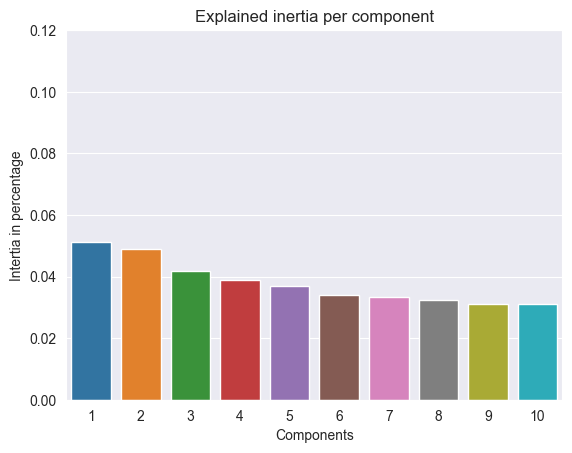

In [22]:
# bar plot of the inertia per dimension
plt.title('Explained inertia per component')
plt.xlabel('Components')
plt.ylabel('Intertia in percentage')
ax = sns.barplot(x=[i for i in range(1,11)], y=mcaPrePro.explained_inertia_)
ax.set(ylim=(0, 0.12))
mcaPrePro.explained_inertia_

## Generating all dimensions

In [23]:
for i in range(2, 10):
    mcaData = prince.MCA(n_components=i, benzecri=False).fit(preprocesseddata)
    mcaData.row_coordinates(preprocesseddata).to_csv("dataset/mca-"+str(i)+"-shootings.csv", index=False)

